In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import preprocessing
from utils import regression
from utils import evaluate

In [8]:
data = pd.read_csv('./data/daejon_people_card.csv',engine='python')

data.shape


(1185, 57)

In [10]:
data

,연월,행정동,남10대 미만,남10대,남20대,남30대,남40대,남50대,남60대,남70대 이상,...,기타제조/도매,비영리유통,용역서비스,신변잡화,운송기구판매,유아교육기관,자동차정비/유지,휴게음식점,미용,수리서비스
0,201901,중앙동,6865,292681,1450989,1243901,1515592,2053253,2003496,632625,...,28115214,0,610286375,1156026248,0,0,47338511,749049049,1109523956,6220620
1,201901,효동,2965,296346,596219,797607,956022,975766,718681,195088,...,0,0,15722607,212943103,0,250119674,69549323,720290437,406169011,0
2,201901,신인동,4978,171795,676765,798858,911048,1050450,816782,226279,...,0,0,0,0,0,115156875,51878717,27123814,941738,0
3,201901,판암1동,5917,107059,544189,640024,771815,861120,497170,122702,...,0,0,9374705,0,0,35351954,37581445,66982278,34435231,0
4,201901,판암2동,1114,26510,143240,180100,208266,255119,190554,51783,...,0,0,0,0,0,0,0,33309928,9564525,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,202003,석봉동,15410,170628,805873,1150528,1142419,1327038,632621,137686,...,0,0,0,0,0,113819360,19822806,176192756,34946113,0
1181,202003,덕암동,39,43848,760489,1041503,1355230,1694902,732820,123823,...,16997741,0,0,0,0,122824462,1375925677,11376885,23226648,0
1182,202003,목상동,396,75575,892438,1408552,1551340,1766480,457505,23890,...,13244240,0,105756280,0,0,17780501,1086003606,100364887,40022596,0
1183,202003,법1동,448,40426,233977,231695,310907,465071,349100,83426,...,0,0,0,0,0,22443398,0,0,3843048,0


In [5]:
li = [[header, data[data[header]!=0].shape[0]] for header in data.columns[18:]]
li.sort(key = lambda x:x[1], reverse=True)
li

[['일반음식점', 1185],
 ['소매', 1145],
 ['미용', 1144],
 ['의료기관/제약', 1140],
 ['휴게음식점', 1117],
 ['음식료품', 1007],
 ['유아교육기관', 994],
 ['자동차정비/유지', 980],
 ['유흥', 943],
 ['의류', 800],
 ['학원', 779],
 ['용역서비스', 778],
 ['레저/스포츠', 706],
 ['문화/취미', 697],
 ['신변잡화', 578],
 ['건축관련업', 464],
 ['숙박', 362],
 ['기타제조/도매', 306],
 ['학습자재', 285],
 ['주유', 271],
 ['전자제품', 208],
 ['직물/침구류', 183],
 ['사무기기', 179],
 ['주방용품', 149],
 ['가구', 149],
 ['기타유통', 107],
 ['운송기구판매', 54],
 ['수리서비스', 54],
 ['전자상거래', 36],
 ['비영리유통', 34],
 ['요금', 30],
 ['가례서비스', 25],
 ['회비', 25],
 ['연료판매', 21],
 ['관광여행', 19],
 ['악기', 15],
 ['대형유통', 15],
 ['학교', 7],
 ['보험', 3]]

In [84]:
category = '의류'

In [85]:
# data = preprocessing.get_specific_dong(data, dongname='신인동')
# data.shape

In [86]:
data[data[category]!=0][category].describe().astype(np.int64)

count           800
mean      243404178
std       563522001
min          305571
25%         9614288
50%        46385917
75%       165843611
max      4382661213
Name: 의류, dtype: int64

# Prepare train, test data

In [87]:
train, test = preprocessing.split_traintest(data)
print(train.shape, test.shape)

(948, 57) (237, 57)


In [88]:
x_header = [x for x in data.columns if '미만' not in x and (x[0]=='남' or x[0]=='여')]
#x_header = ['남10대', '남20대', '남30대', '남60대', '남70대 이상', '여10대', '여20대', '여30대', '여60대', '여70대 이상']
#x_header = ['남10대', '남20대', '남30대', '남40대', '남50대', '여10대', '여20대', '여30대', '여40대', '여50대']


#x_header = ['남10대', '남20대']
# x_header = [x for x in data.columns if '미만' not in x and x[0]=='여']
# x_header = ['남10대', '남20대', '여10대', '여20대']
y_header = category
print(x_header)
print(y_header)

['남10대', '남20대', '남30대', '남40대', '남50대', '남60대', '남70대 이상', '여10대', '여20대', '여30대', '여40대', '여50대', '여60대', '여70대 이상']
의류


In [89]:
x_train, y_train = preprocessing.split_xy(train, x_header, y_header)
x_test, y_test = preprocessing.split_xy(test, x_header, y_header)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(667, 14) (667,)
(133, 14) (133,)


C:\Users\ESLAB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ESLAB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ESLAB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ESLAB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ESLAB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ESLAB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from c

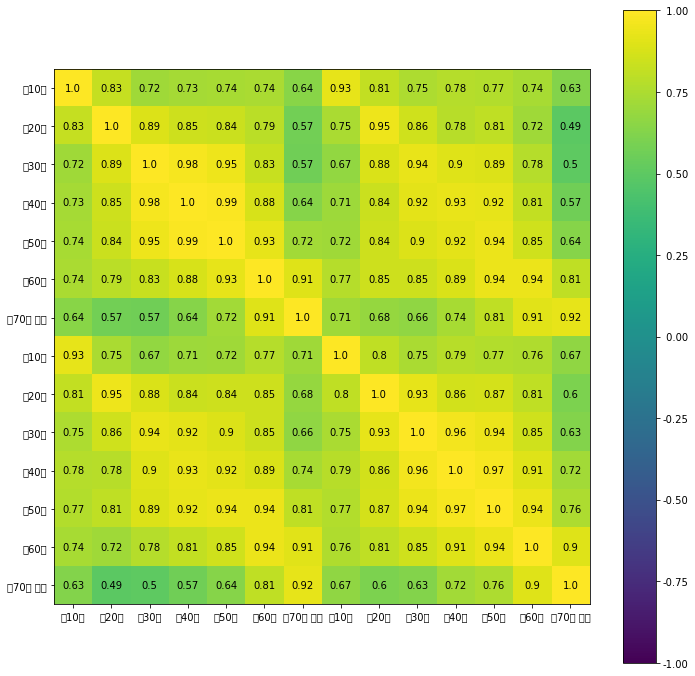

In [90]:
evaluate.visualize_CorrelCoeff_heatmap(x_train, x_header, figsize=(12, 12))

# Train regression model

In [91]:
hidden_layers = [32, 8, 4]

In [77]:
model_LR = regression.get_model_LinearRegression(x_train, y_train)
model_Elastic = regression.get_model_ElasticNet(x_train, y_train)
model_SVR = regression.get_model_SVR(x_train, y_train)
model_MLPRegression = regression.get_model_MLPRegression(
    x_train, y_train, 
    hidden_layers=hidden_layers,
    max_iter=500,
    alpha=0.0001,
    random_state=42
)

C:\Users\ESLAB\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8311738071029465e+19, tolerance: 7361978732066997.0
  positive)
C:\Users\ESLAB\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
model_LR.coef_

array([ 476.13887698,  -28.93346732,  -95.96981492,  552.48562865,
        -68.869054  , -254.29520161, 1901.70689735, -453.34386459,
         27.85430121,  811.20403376, -542.37691771, -736.4655228 ,
        351.80059072, -606.04252258])

# Evaluate

### Linear Regression

------- evaluate Linear Regression -------
RMSE : 195771673.817214
R2 : 0.416381
----------------------------


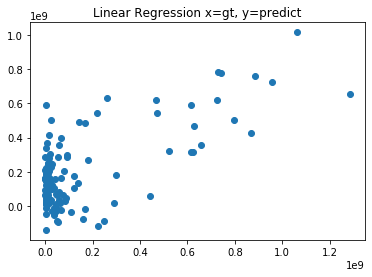

In [79]:
evaluate.eval_regression(y_test, model_LR.predict(x_test), model_name='Linear Regression')

### ElasticNet

------- evaluate ElasticNet -------
RMSE : 195841277.036694
R2 : 0.415966
----------------------------


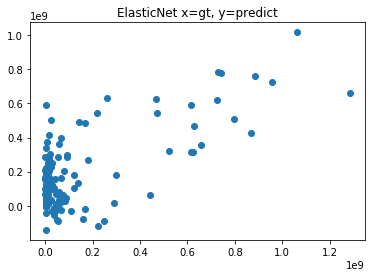

In [80]:
evaluate.eval_regression(y_test, model_Elastic.predict(x_test), model_name='ElasticNet')

### SVR

------- evaluate SVM Regression -------
RMSE : 277226866.061112
R2 : -0.170308
----------------------------


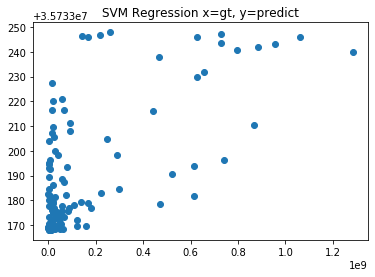

In [81]:
evaluate.eval_regression(y_test, model_SVR.predict(x_test), model_name='SVM Regression')

# MLP Regressoin

------- evaluate SVM Regression -------
RMSE : 186045915.488586
R2 : 0.472928
----------------------------


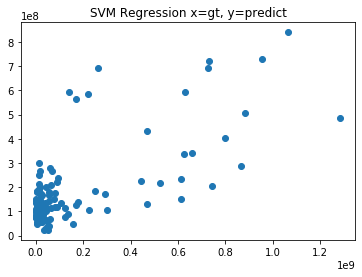

In [82]:
evaluate.eval_regression(y_test, model_MLPRegression.predict(x_test), model_name='SVM Regression')

------- evaluate SVM Regression -------
RMSE : 4878264698.721118
R2 : -0.605263
----------------------------


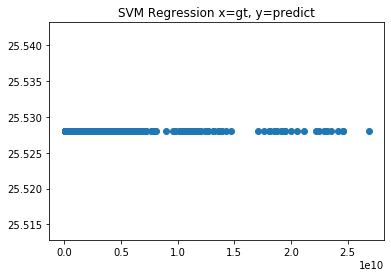

In [54]:
evaluate.eval_regression(y_train, model_MLPRegression.predict(x_train), model_name='SVM Regression')

In [282]:
x_test.shape

(195, 14)

In [281]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

In [72]:
x_test.shape

(132,)

In [73]:
scaler = MinMaxScaler()
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_test_scaled = scaler.fit(x_test).transform(x_test)
y_test_scaled = scaler.fit(y_test).transform(y_test)
print(x_test_scaled.shape, y_test_scaled.shape)
print(x_test_scaled.min(), x_test_scaled.max(), y_test_scaled.min(), y_test_scaled.max())


(132, 1) (132, 1)
0.0 1.0 0.0 1.0000000000000002


In [68]:
x_test_scaled.sum(axis=1).shape

(132,)

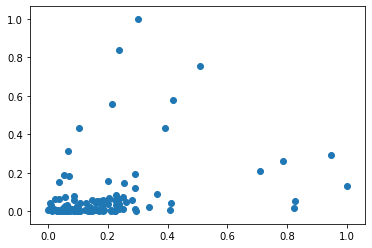

In [74]:
plt.scatter(x=x_test_scaled, y=y_test_scaled)

In [ ]:
from sklearn.neural_network import 